In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
import numpy as np
import imghdr
import cv2
import os

In [2]:
DATA_DIR = r"C:\python\COMPUTER VISION\tensorflow\image_classification\data"
ACCEPTED_FORMAT = ["jpeg" , "jpg" , "png" , "bmp"]

# removing dodgy images
for image_class in os.listdir(DATA_DIR):
    for file_path in os.listdir(os.path.join(DATA_DIR , image_class)):

        image_path = os.path.join(DATA_DIR , image_class , file_path)

        try:
            img = cv2.imread(image_path)
            data_type = imghdr.what(image_path)

            if data_type not in ACCEPTED_FORMAT :
                print("the image with " + str(image_path) + "is not supported , will be removed " )
                os.remove(image_path)

        except Exception as e:
            print(f"the image {image_path} could not be read")
            os.remove(image_path)

In [3]:
base_data = tf.keras.utils.image_dataset_from_directory("data")
data_iter = base_data.as_numpy_iterator()
batch = data_iter.next()

Found 787 files belonging to 4 classes.


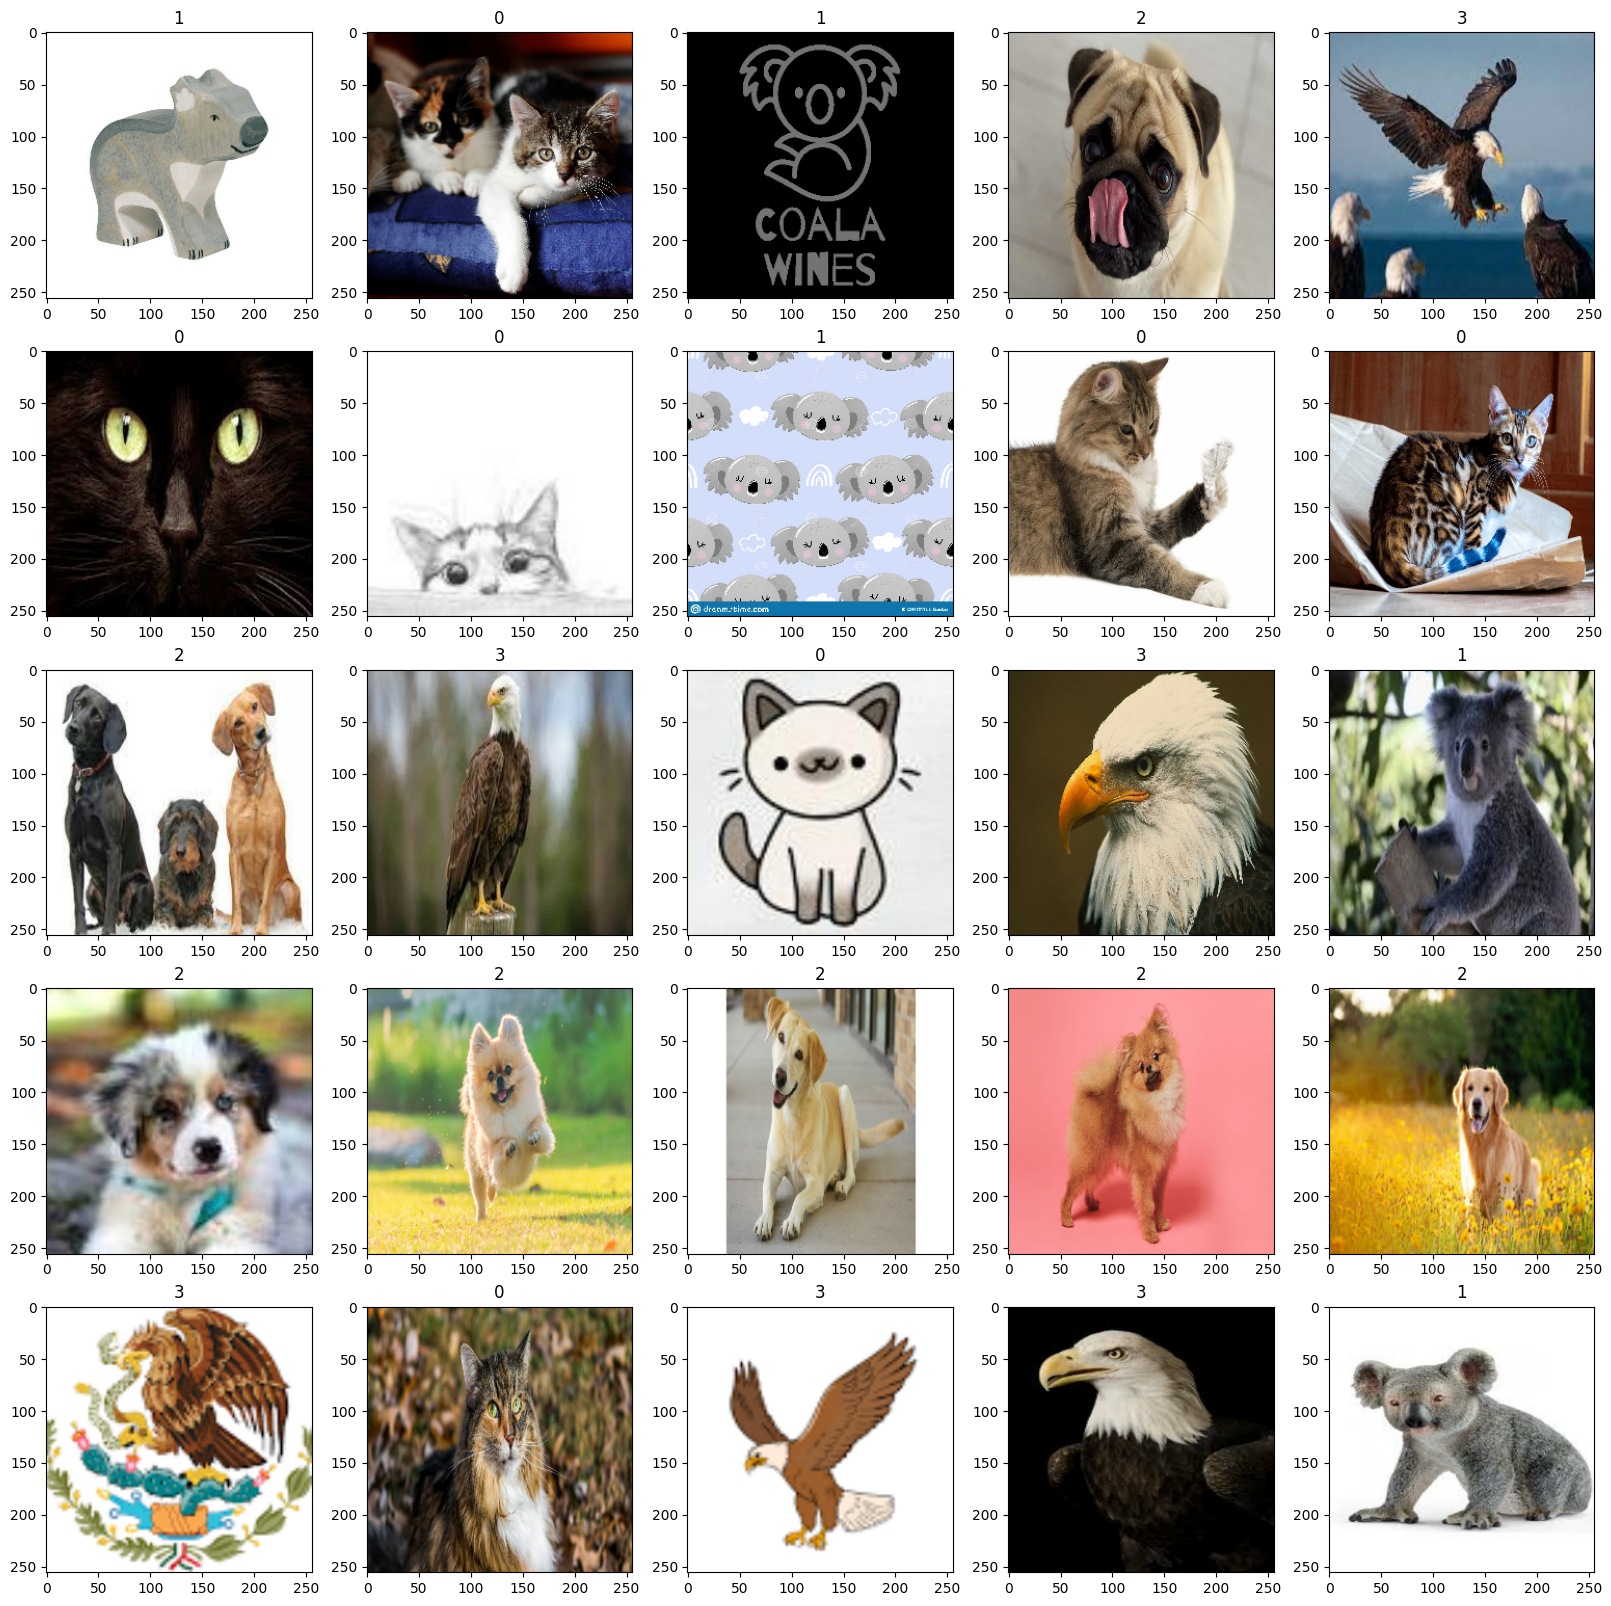

In [4]:
# showing some of the images in the batch 
fig, ax = plt.subplots(ncols=5 , nrows=5 , figsize=(20,20))
for idx, img in enumerate(batch[0][:25]):
    ax[idx//5 , idx%5].imshow(img.astype(int))
    ax[idx//5 , idx%5].title.set_text(batch[1][idx])

In [5]:
# Define a map function to convert labels to one-hot encoded format
def preprocess_data(image, label):
    image = image / 255
    label = tf.one_hot(label, 4)
    return image, label

In [6]:
from keras.utils import to_categorical
import tensorflow.keras.backend as K

# y_train = K.eval(y_train)
data = base_data.map(preprocess_data)
batch = data.as_numpy_iterator().next()



In [7]:
print(batch[1])

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


c:\Users\Morvarid\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


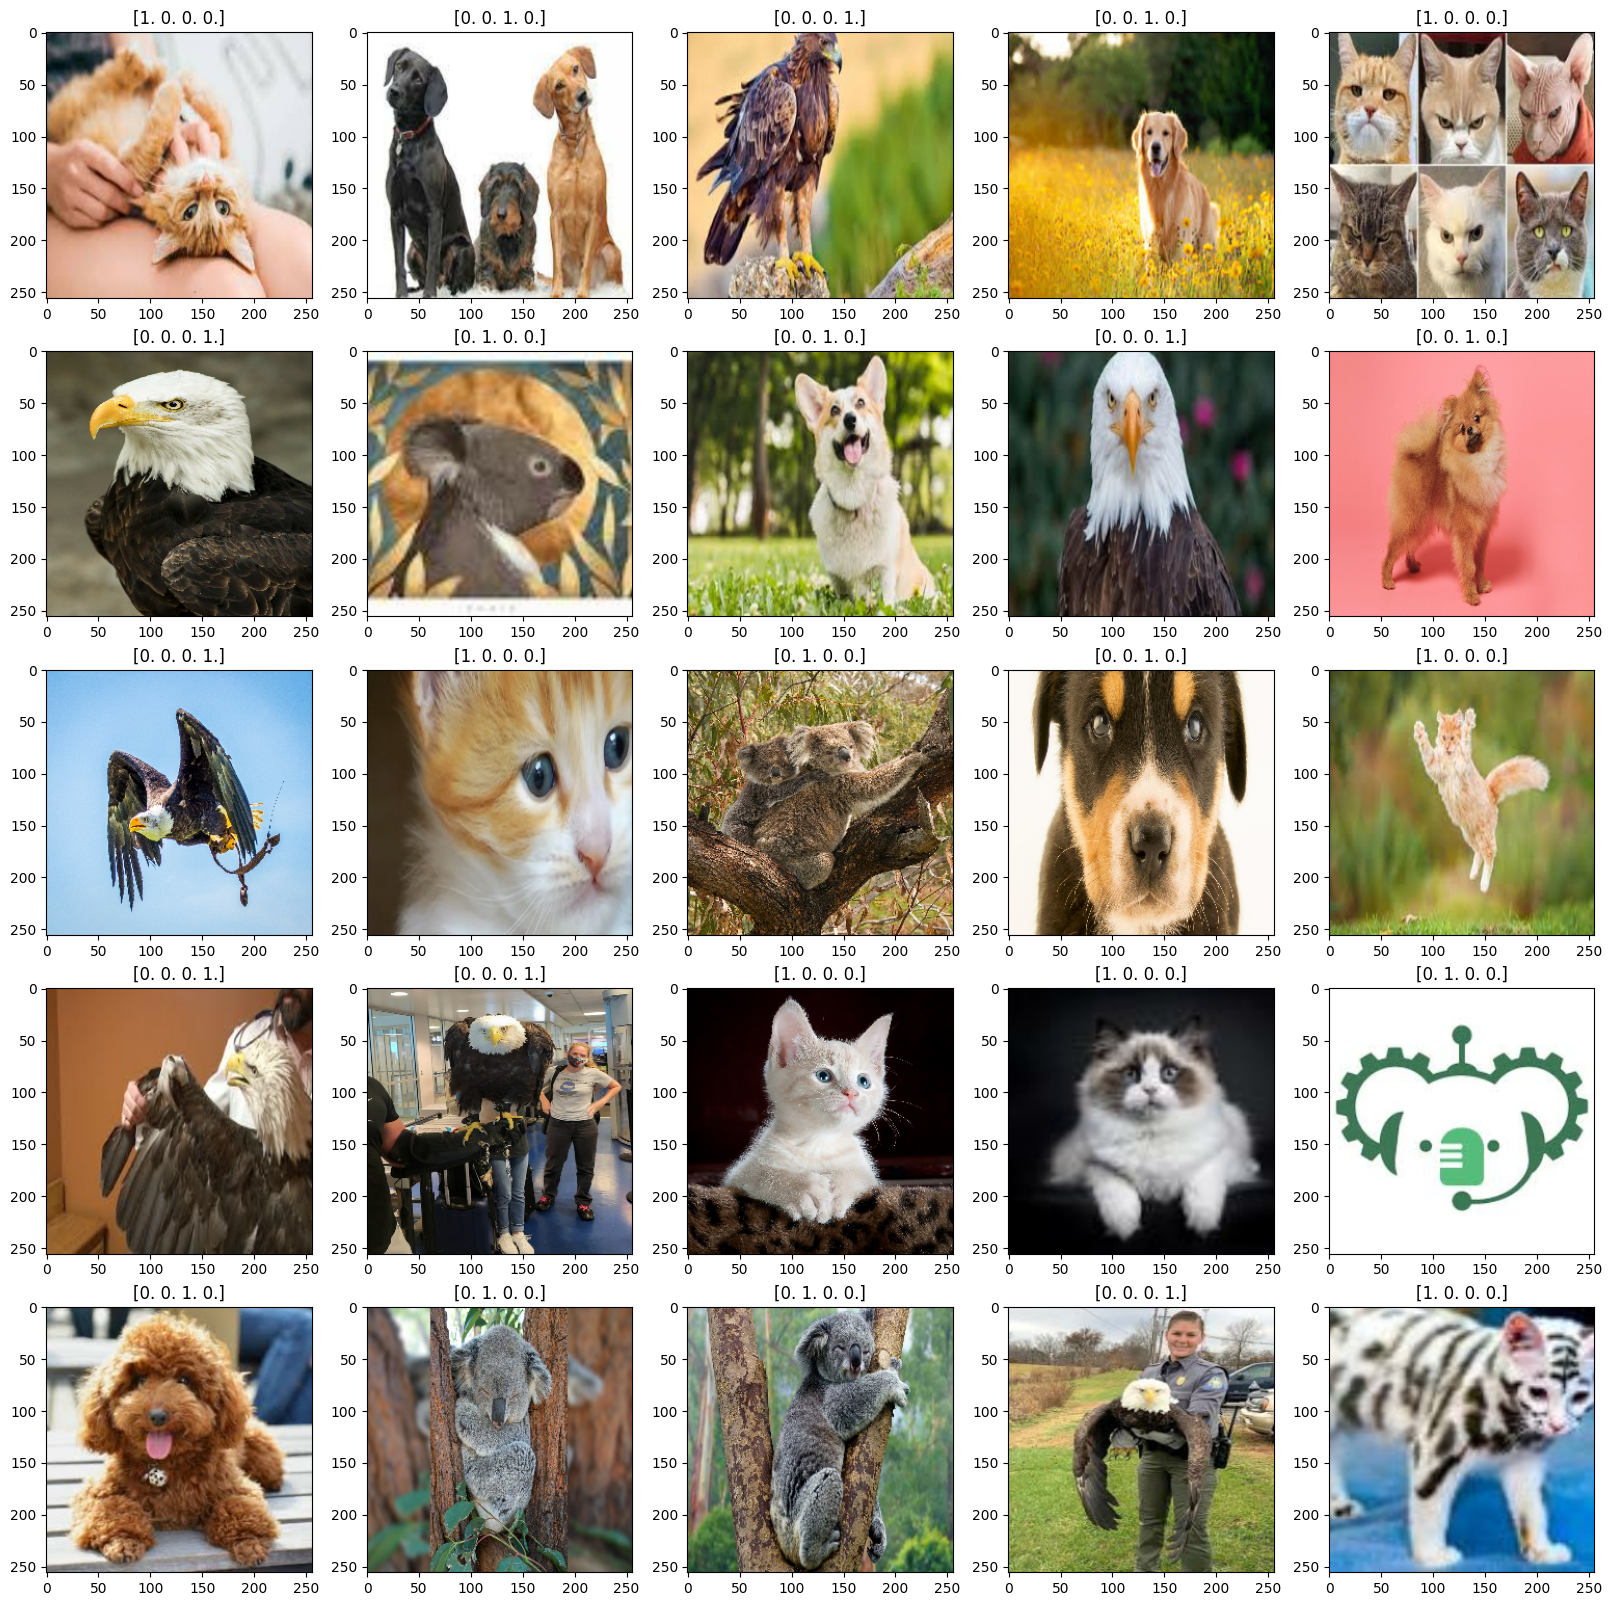

In [8]:
# showing some of the images in the batch 
fig, ax = plt.subplots(ncols=5 , nrows=5 , figsize=(20,20))
for idx, img in enumerate(batch[0][:25]):
    ax[idx//5 , idx%5].imshow(img)
    ax[idx//5 , idx%5].title.set_text(batch[1][idx])

In [9]:
train_size = int(len(data) * 0.7)
valid_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

print(train_size)
print(valid_size)
print(test_size)

17
5
2


In [10]:
train_data = data.take(train_size)
valid_data = data.skip(train_size).take(valid_size)
test_data = data.skip(train_size + valid_size).take(test_size)

In [11]:
num_train_images = tf.data.experimental.cardinality(valid_data).numpy()
print("Number of images in train dataset:", num_train_images)

Number of images in train dataset: 5


In [19]:
train_data_iter = test_data.as_numpy_iterator().next()
print(train_data_iter[1])

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [14]:
model.compile('adam', loss= "categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [15]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_loss', save_best_only=True),
    TensorBoard(log_dir='logs/fit/' + datetime.now().strftime("%Y%m%d-%H%M%S"))
]

In [16]:
# Train the model
model.fit(train_data ,
          validation_data=valid_data , 
          epochs=50, 
          batch_size = 32 , 
          verbose = 1 , 
          callbacks=callbacks)

Epoch 1/50
17/17 [==============================] - 18s 1s/step - loss: 1.4780 - accuracy: 0.2831 - val_loss: 1.3457 - val_accuracy: 0.2125
Epoch 2/50
17/17 [==============================] - 25s 1s/step - loss: 1.2865 - accuracy: 0.3456 - val_loss: 1.1547 - val_accuracy: 0.4500
Epoch 3/50
17/17 [==============================] - 26s 1s/step - loss: 1.0927 - accuracy: 0.5625 - val_loss: 0.9837 - val_accuracy: 0.6313
Epoch 4/50
17/17 [==============================] - 24s 1s/step - loss: 0.8724 - accuracy: 0.6691 - val_loss: 0.8876 - val_accuracy: 0.6062
Epoch 5/50
17/17 [==============================] - 24s 1s/step - loss: 0.6445 - accuracy: 0.7592 - val_loss: 0.6777 - val_accuracy: 0.7688
Epoch 6/50
17/17 [==============================] - 25s 1s/step - loss: 0.4510 - accuracy: 0.8401 - val_loss: 0.4554 - val_accuracy: 0.8687
Epoch 7/50
17/17 [==============================] - 30s 2s/step - loss: 0.2550 - accuracy: 0.9118 - val_loss: 0.3134 - val_accuracy: 0.9000
Epoch 8/50
17/17 [==

In [1]:
test_batch = test_data.as_numpy_iterator().next()
print(test_batch[0][1].shape)
plt.imshow(test_batch[0][1])
plt.show()

NameError: name 'test_data' is not defined

cat : 0         coala : 1           dog : 2             eagle : 3

In [39]:
result = model.predict(np.expand_dims(test_batch[0][1] , 0))
print(result)
print(np.argmax(result))

1/1 [==============================] - 0s 24ms/step
[[8.7100498e-06 1.1253538e-06 4.2323620e-05 9.9994791e-01]]
3
